In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from pattern.nl import parse, split
from collections import Counter
from gensim.models import KeyedVectors
# Need the interactive Tools for Matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from adjustText import adjust_text
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from random import sample
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
import seaborn as sns
import editdistance


stopz = 'http://rubenros.nl/wp-content/uploads/2019/08/stopwords-nl.txt'
req = requests.get(stopz)
stopz = str(req.content)
stopz = stopz.split('\\n')

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
os.chdir('D:/Rampen/models/periods')
model = KeyedVectors.load('model-1830-1850.w2v')
os.chdir('D:/Rampen/ngrams')

l = sorted(glob.glob('*bigrams.csv'))

In [48]:
def GetCloseED(list_words, search_terms,d):
    output_list = list()
        
    for candidate in list_words:
        for search in search_terms:
            if editdistance.eval(search, candidate) < d:
                output_list.append(candidate)
    return output_list

In [28]:
df = pd.DataFrame()

for i in l[0:100]:
    d= pd.read_csv(i)
    list_words = GetCloseED([w.split('_')[0] for w in list(d['gram'])], ["nationaal","nationaale","nationaalen","nationale","nationalen"])
    d = d[d['gram'].str.contains("|".join(list(set([x + "_" for x in list_words]))))]
    d['gram'] = d['gram'].str.split('_').str[1]
    d = d[~d['gram'].isin(stopz)]
    d['year'] = i[0:4]
    d = d.groupby(['gram','year'],as_index=False).agg('sum')
    d = d.reset_index(drop=True)
    df = df.append(d)
    print(i)
    print(len(list(set([x + "_" for x in list_words]))))

1750-bigrams.csv
10
1751-bigrams.csv
12
1752-bigrams.csv
12
1753-bigrams.csv
6
1754-bigrams.csv
9
1755-bigrams.csv
14
1756-bigrams.csv
12
1757-bigrams.csv
7
1758-bigrams.csv
11
1759-bigrams.csv
13
1760-bigrams.csv
11
1761-bigrams.csv
12
1762-bigrams.csv
16
1763-bigrams.csv
19
1764-bigrams.csv
19
1765-bigrams.csv
12
1766-bigrams.csv
13
1767-bigrams.csv
22
1768-bigrams.csv
20
1769-bigrams.csv
15
1770-bigrams.csv
18
1771-bigrams.csv
13
1772-bigrams.csv
11
1773-bigrams.csv
22
1774-bigrams.csv
27
1775-bigrams.csv
23
1776-bigrams.csv
26
1777-bigrams.csv
20
1778-bigrams.csv
18
1779-bigrams.csv
23
1780-bigrams.csv
21
1781-bigrams.csv
26
1782-bigrams.csv
26
1783-bigrams.csv
22
1784-bigrams.csv
28
1785-bigrams.csv
16
1786-bigrams.csv
47
1787-bigrams.csv
24
1788-bigrams.csv
30
1789-bigrams.csv
130
1790-bigrams.csv
175
1791-bigrams.csv
158
1792-bigrams.csv
178
1793-bigrams.csv
118
1794-bigrams.csv
94
1795-bigrams.csv
137
1796-bigrams.csv
285
1797-bigrams.csv
248
1798-bigrams.csv
159
1799-bigrams.c

In [30]:
dfa = df.pivot(columns='year',index='gram',values='count')
dfa = dfa.reset_index()
dfa.head()

year,gram,1750,1751,1752,1753,1754,1755,1756,1757,1758,...,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
0,05rente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0onomif,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0»hj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN
4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN


In [117]:
def PlotWords(df, input_term, model, start_year,end_year):
    list_words = [k for k,v in model.most_similar(input_term, topn=50)] + input_term
        
    dw = dict()
    for word in list_words:
        alts = list(set(GetCloseED(list_words=df['gram'],search_terms=[word],d=2)))
        alts = [a for a in alts if a != word]
        if len(alts) == 0:
            alts = [word]
        else:
            alts=alts+[word]
        dw.update({word:alts})
    
    new_df = pd.DataFrame()
    
    for key in dw.keys():
        tdf = df[df['gram'].isin(dw[key])]
        tdf = tdf.groupby('year').sum().reset_index()
        tdf['gram'] = key
        new_df = new_df.append(tdf)
    
    tdf = new_df.pivot(columns='year',index='gram',values='count')
    tdf = tdf.reset_index()    
    #for c in df.columns[1:]:
    #    df[c] = df[c] / df[c].sum()
    
    tdf = tdf.T
    list_words = list(tdf.iloc[0,])
    tdf.columns = list_words
    tdf = tdf.iloc[1:,:]
    tdf['y'] = tdf.index.astype(int)
    tdf = tdf[(tdf['y'] >= start_year) & (tdf['y'] <= end_year)]
    #tdf.plot.area(x='y',y=list_words,figsize=(15,7))
    
    tdf= tdf.reset_index(drop=True)

    col = sns.color_palette("tab20b", len(list_words))
    x_lab = "Years"
    y_lab = "Absolute Frequency"
    title = "Collocates most similar to: " + " ".join(input_term)
    
    x_values = list(tdf['y'])
    y_values = [list(tdf[c]) for c in list_words]
    labels = list_words
    

    return tdf

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


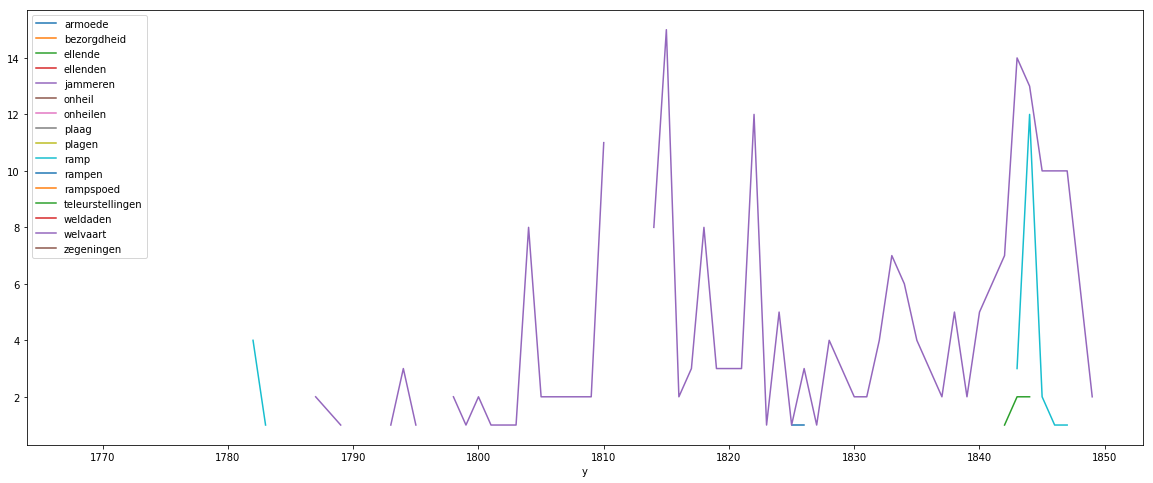

In [118]:
l=PlotWords(df, ['rampen'], model, 1750, 1850)
l.plot(x='y',y=list(l.columns[:-1]),figsize = (20,8))

In [65]:
os.chdir('D:/Rampen/models/periods')
for m in glob.glob('model*.w2v'):
    model = KeyedVectors.load(m)
    print([k for k,v in dict(model.most_similar('ramp',topn=8)).items()])

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


['verwoesting', 'fchrik', 'elende', 'ontfteltenis', 'rampen', 'schrik', 'veroorzaak', 'verfchriklyke']
['rampen', 'onheilen', 'plaag', 'verwoesting', 'ellende', 'ongelukkigen', 'ongelukken', 'gebeurtenis']
['rampen', 'onheilen', 'ellende', 'ongelukkige', 'watervloed', 'overftrooming', 'ellenden', 'verwoesting']
['ellende', 'rampfpoed', 'ongelukkig', 'verwoesting', 'ongelukkige', 'ongelukkigen', 'elende', 'ontzettend']


In [119]:
l.to_csv('test.csv')

In [8]:
os.chdir('C:/Users/Ruben/Documents/Artikelen/Disasters/output-data')

In [13]:
df = pd.read_csv('nationale_vocabulary_firsted.csv')

In [14]:
d = []

for y in list(set(df['year'])):
    t = df[df['year'] == y]
    t = len(t)
    d.append([y,t])

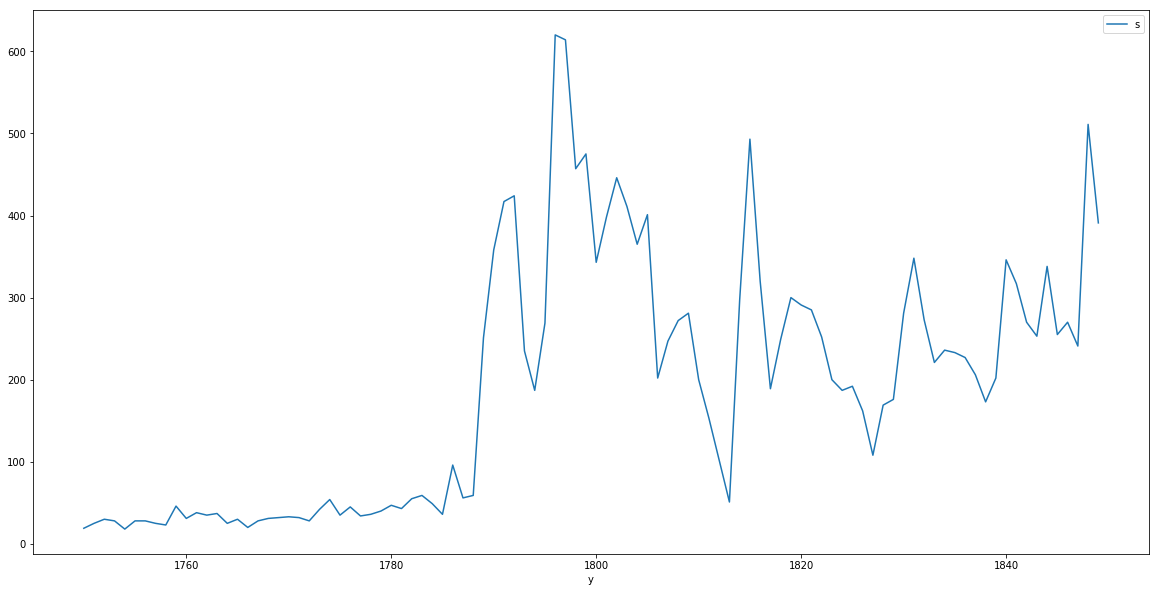

In [17]:
pd.DataFrame(d,columns=['y','s']).plot(x="y",y='s',figsize=(20,10))